# IPL predictions on 'value' of players

**This notebook is maintained as a proof of concept for the Github repo: https://github.com/adityarc19/IPL-player-value-prediction whose web app is deployed at --> https://ipl-player-value-pred-app.herokuapp.com/**

Aim of this notebook is to analyse the ipl player rankings dataset of all past seasons (i.e. 2008 to 2020) and then implement a suitable machine learning algorithm which would predict the 'Value' of players based on other input parameters.
A web-scraped copy of the data files are stored at https://github.com/adityarc19/IPL-analysis/tree/main/data.

Original dataset source : http://www.cricmetric.com/ipl/ranks/

In [2]:
#import standard data sci libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/aditya/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading in the .csv datasets:

In [3]:
df_2019 = pd.read_csv('https://raw.githubusercontent.com/adityarc19/IPL-analysis/main/data/2019.csv')
df_2019

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,DA Warner,Sunrisers Hyderabad,410,1.414,0.224,"$1,953,130","$2,742,662"
1,2,AD Russell,Kolkata Knight Riders,307,1.060,0.242,"$1,328,130","$2,200,658"
2,3,MS Dhoni,Chennai Super Kings,305,1.053,0.176,"$2,343,750","$2,189,940"
3,4,Imran Tahir,Chennai Super Kings,295,1.018,0.200,"$156,250","$2,136,352"
4,5,KL Rahul,Kings XI Punjab,288,0.994,0.217,"$1,718,750","$2,099,606"
...,...,...,...,...,...,...,...,...
156,157,DS Kulkarni,Rajasthan Royals,-155,-0.534,0.044,"$117,190","$-239,892"
157,158,B Kumar,Sunrisers Hyderabad,-158,-0.544,0.095,"$1,328,130","$-255,203"
158,159,Kuldeep Yadav,Kolkata Knight Riders,-159,-0.549,0.023,"$906,250","$-262,858"
159,160,K Gowtham,Rajasthan Royals,-201,-0.695,0.016,"$968,750","$-486,397"


In [4]:
df_2020 = pd.read_csv('https://raw.githubusercontent.com/adityarc19/IPL-analysis/main/data/2020.csv')
df_2020

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,JJ Bumrah,Mumbai Indians,379,1.281,0.238,"$1,093,750","$2,448,655"
1,2,KL Rahul,Kings XI Punjab,330,1.113,0.194,"$1,718,750","$2,204,319"
2,3,K Rabada,Delhi Capitals,320,1.082,0.232,"$656,250","$2,159,233"
3,4,Ishan Kishan,Mumbai Indians,261,0.881,0.157,"$968,750","$1,866,902"
4,5,S Dhawan,Delhi Capitals,249,0.842,0.168,"$812,500","$1,810,181"
...,...,...,...,...,...,...,...,...
145,146,AR Patel,Delhi Capitals,-180,-0.607,0.081,"$714,300","$-297,218"
146,147,NA Saini,Royal Challengers Bangalore,-191,-0.646,0.061,"$468,750","$-353,939"
147,148,S Gopal,Rajasthan Royals,-215,-0.726,0.067,"$31,250","$-470,290"
148,149,KH Pandya,Mumbai Indians,-251,-0.848,0.066,"$1,375,000","$-647,724"


In [5]:
df_2018 = pd.read_csv('/Users/aditya/Downloads/archive/2018.csv')
df_2018

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,KS Williamson,Sunrisers Hyderabad,351,1.221,0.214,"$468,750","$2,397,239"
1,2,KL Rahul,Kings XI Punjab,328,1.141,0.193,"$1,718,750","$2,280,549"
2,3,AT Rayudu,Chennai Super Kings,327,1.137,0.198,"$343,750","$2,274,714"
3,4,RR Pant,Delhi Daredevils,322,1.122,0.201,"$2,343,750","$2,252,835"
4,5,MS Dhoni,Chennai Super Kings,290,1.011,0.167,"$2,343,750","$2,090,927"
...,...,...,...,...,...,...,...,...
144,145,Shivam Mavi,Kolkata Knight Riders,-190,-0.662,0.038,"$468,750","$-349,363"
145,146,AR Patel,Kings XI Punjab,-191,-0.665,0.039,"$1,953,130","$-353,739"
146,147,JD Unadkat,Rajasthan Royals,-204,-0.712,0.079,"$1,796,880","$-422,295"
147,148,BA Stokes,Rajasthan Royals,-207,-0.720,0.078,"$1,953,130","$-433,964"


In [6]:
df_2017 = pd.read_csv('/Users/aditya/Downloads/archive/2017.csv')
df_2017

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,DA Warner,Sunrisers Hyderabad,351,1.274,0.211,"$916,000","$1,783,802"
1,2,JD Unadkat,Rising Pune Supergiants,316,1.146,0.207,"$45,000","$1,648,517"
2,3,B Kumar,Sunrisers Hyderabad,304,1.104,0.228,"$708,000","$1,604,126"
3,4,HM Amla,Kings XI Punjab,236,0.854,0.151,NaN,"$1,339,898"
4,5,AJ Tye,Gujarat Lions,205,0.742,0.132,"$75,000","$1,221,524"
...,...,...,...,...,...,...,...,...
155,156,MM Sharma,Kings XI Punjab,-171,-0.619,0.093,"$975,000","$-216,936"
156,157,S Aravind,Royal Challengers Bangalore,-183,-0.665,0.049,NaN,"$-265,554"
157,158,SR Watson,Royal Challengers Bangalore,-196,-0.712,0.050,"$1,425,000","$-315,229"
158,159,I Sharma,Sunrisers Hyderabad,-217,-0.786,0.013,"$570,000","$-393,441"


In [7]:
df_2016 = pd.read_csv('/Users/aditya/Downloads/archive/2016.csv')
df_2016

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,V Kohli,Royal Challengers Bangalore,615,2.041,0.365,"$2,500,000","$2,594,886"
1,2,DA Warner,Sunrisers Hyderabad,414,1.375,0.237,"$916,000","$1,890,050"
2,3,AB de Villiers,Royal Challengers Bangalore,307,1.019,0.189,"$1,583,333","$1,513,292"
3,4,YS Chahal,Royal Challengers Bangalore,251,0.833,0.155,"$16,000","$1,316,446"
4,5,G Gambhir,Kolkata Knight Riders,241,0.799,0.147,"$1,666,667","$1,280,463"
...,...,...,...,...,...,...,...,...
153,154,VR Aaron,Royal Challengers Bangalore,-151,-0.502,0.021,"$333,000","$-96,399"
154,155,GJ Maxwell,Kings XI Punjab,-159,-0.528,0.033,"$1,000,000","$-123,916"
155,156,P Kumar,Gujarat Lions,-214,-0.712,0.076,"$525,000","$-318,645"
156,157,HH Pandya,Mumbai Indians,-218,-0.722,0.028,"$16,667","$-329,228"


In [8]:
df_2015 = pd.read_csv('/Users/aditya/Downloads/archive/2015.csv')
df_2015

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,AB de Villiers,Royal Challengers Bangalore,300,1.080,0.188,"$1,583,333","$1,689,095"
1,2,AM Rahane,Rajasthan Royals,274,0.986,0.180,"$1,333,333","$1,585,393"
2,3,DJ Bravo,Chennai Super Kings,251,0.901,0.227,"$666,667","$1,491,620"
3,4,DA Warner,Sunrisers Hyderabad,243,0.874,0.172,"$916,000","$1,461,833"
4,5,MC Henriques,Sunrisers Hyderabad,242,0.871,0.201,"$166,000","$1,458,524"
...,...,...,...,...,...,...,...,...
140,141,HH Pandya,Mumbai Indians,-165,-0.595,0.031,"$16,667","$-158,784"
141,142,DJ Hooda,Rajasthan Royals,-184,-0.660,0.037,"$66,000","$-230,492"
142,143,GJ Maxwell,Kings XI Punjab,-187,-0.673,0.047,"$1,000,000","$-244,834"
143,144,R Vinay Kumar,Mumbai Indians,-203,-0.732,0.044,"$466,000","$-309,924"


In [9]:
df_2014 = pd.read_csv('/Users/aditya/Downloads/archive/2014.csv')
df_2014

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,RV Uthappa,Kolkata Knight Riders,285,0.968,0.210,"$833,000","$1,696,711"
1,2,MS Dhoni,Chennai Super Kings,229,0.779,0.143,"$2,083,333","$1,466,583"
2,3,DA Warner,Sunrisers Hyderabad,218,0.742,0.167,"$916,000","$1,421,532"
3,4,SL Malinga,Mumbai Indians,209,0.711,0.152,"$1,350,000","$1,383,786"
4,5,VR Aaron,Royal Challengers Bangalore,208,0.707,0.175,"$333,000","$1,378,916"
...,...,...,...,...,...,...,...,...
147,148,JJ Bumrah,Mumbai Indians,-149,-0.507,0.046,"$200,000","$-99,257"
148,149,DW Steyn,Sunrisers Hyderabad,-150,-0.512,0.097,"$1,200,000","$-105,345"
149,150,R Vinay Kumar,Kolkata Knight Riders,-157,-0.535,0.037,"$466,000","$-133,350"
150,151,Mohammed Shami,Delhi Daredevils,-201,-0.684,0.055,"$708,000","$-314,773"


In [10]:
df_2013 = pd.read_csv('/Users/aditya/Downloads/archive/2013.csv')
df_2013

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,CH Gayle,Royal Challengers Bangalore,447,1.729,0.210,"$2,000,000","$2,554,267"
1,2,MEK Hussey,Chennai Super Kings,414,1.602,0.224,"$425,000","$2,419,187"
2,3,V Kohli,Royal Challengers Bangalore,339,1.311,0.179,"$1,800,000","$2,109,674"
3,4,DJ Bravo,Chennai Super Kings,258,1.001,0.218,"$200,000","$1,779,953"
4,5,SK Raina,Chennai Super Kings,253,0.981,0.143,"$1,300,000","$1,758,680"
...,...,...,...,...,...,...,...,...
194,195,A Nehra,Delhi Daredevils,-133,-0.515,0.051,NaN,"$167,507"
195,196,B Kumar,Pune Warriors,-144,-0.557,0.081,"$60,000","$122,835"
196,197,PP Chawla,Kings XI Punjab,-180,-0.697,0.076,"$900,000","$-26,071"
197,198,IK Pathan,Delhi Daredevils,-183,-0.707,0.095,"$1,900,000","$-36,708"


In [11]:
df_2012 = pd.read_csv('/Users/aditya/Downloads/archive/2012.csv')
df_2012

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,CH Gayle,Royal Challengers Bangalore,354,1.286,0.212,"$650,000","$1,644,515"
1,2,S Dhawan,Deccan Chargers,304,1.103,0.208,"$300,000","$1,500,824"
2,3,SP Narine,Kolkata Knight Riders,298,1.082,0.187,"$700,000","$1,484,335"
3,4,G Gambhir,Kolkata Knight Riders,221,0.804,0.148,"$2,400,000","$1,266,050"
4,5,AM Rahane,Rajasthan Royals,217,0.787,0.156,NaN,"$1,252,702"
...,...,...,...,...,...,...,...,...
183,184,MS Gony,Deccan Chargers,-144,-0.523,0.023,"$290,000","$224,093"
184,185,P Kumar,Kings XI Punjab,-160,-0.580,0.087,"$800,000","$179,337"
185,186,YK Pathan,Kolkata Knight Riders,-165,-0.598,0.065,"$2,100,000","$165,204"
186,187,IK Pathan,Delhi Daredevils,-231,-0.839,0.091,"$1,900,000","$-24,029"


In [12]:
df_2011 = pd.read_csv('/Users/aditya/Downloads/archive/2011.csv')
df_2011

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,CH Gayle,Royal Challengers Bangalore,351,1.303,0.239,"$650,000","$1,674,414"
1,2,SL Malinga,Mumbai Indians,325,1.207,0.207,NaN,"$1,592,801"
2,3,S Badrinath,Chennai Super Kings,267,0.990,0.160,"$800,000","$1,408,322"
3,4,SE Marsh,Kings XI Punjab,246,0.912,0.149,"$400,000","$1,342,011"
4,5,SR Tendulkar,Mumbai Indians,217,0.807,0.166,NaN,"$1,252,747"
...,...,...,...,...,...,...,...,...
193,194,NV Ojha,Delhi Daredevils,-176,-0.652,0.033,"$270,000","$12,400"
194,195,M Manhas,Pune Warriors,-186,-0.691,0.023,NaN,"$-20,756"
195,196,KA Pollard,Mumbai Indians,-196,-0.727,0.091,"$750,000","$-51,360"
196,197,B Lee,Kolkata Knight Riders,-216,-0.801,0.041,"$400,000","$-114,270"


In [13]:
df_2010 = pd.read_csv('/Users/aditya/Downloads/archive/2010.csv')
df_2010

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,SR Tendulkar,Mumbai Indians,268,0.948,0.205,NaN,"$1,047,446"
1,2,SK Raina,Chennai Super Kings,239,0.845,0.223,"$650,000","$990,667"
2,3,DPMD Jayawardene,Kings XI Punjab,195,0.691,0.146,"$475,000","$905,775"
3,4,KP Pietersen,Royal Challengers Bangalore,160,0.566,0.126,"$1,550,000","$836,869"
4,5,JH Kallis,Royal Challengers Bangalore,157,0.556,0.268,"$900,000","$831,356"
...,...,...,...,...,...,...,...,...
174,175,P Kumar,Royal Challengers Bangalore,-137,-0.486,0.074,NaN,"$256,954"
175,176,AC Gilchrist,Deccan Chargers,-144,-0.511,0.050,"$700,000","$243,172"
176,177,B Lee,Kings XI Punjab,-153,-0.542,0.006,"$900,000","$226,084"
177,178,R McLaren,Mumbai Indians,-167,-0.591,0.054,NaN,"$199,072"


In [14]:
df_2009 = pd.read_csv('/Users/aditya/Downloads/archive/2009.csv')
df_2009

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,ML Hayden,Chennai Super Kings,338,1.366,0.238,"$375,000","$1,331,596"
1,2,AB de Villiers,Delhi Daredevils,256,1.037,0.195,"$300,000","$1,145,098"
2,3,JP Duminy,Mumbai Indians,191,0.775,0.177,"$950,000","$996,579"
3,4,BJ Hodge,Kolkata Knight Riders,189,0.766,0.196,NaN,"$991,477"
4,5,RG Sharma,Deccan Chargers,156,0.630,0.174,"$750,000","$914,384"
...,...,...,...,...,...,...,...,...
160,161,P Kumar,Royal Challengers Bangalore,-103,-0.418,0.107,NaN,"$320,310"
161,162,Harmeet Singh,Deccan Chargers,-116,-0.470,0.019,NaN,"$290,833"
162,163,SC Ganguly,Kolkata Knight Riders,-119,-0.480,0.067,NaN,"$285,164"
163,164,JH Kallis,Royal Challengers Bangalore,-134,-0.544,0.146,"$900,000","$248,885"


In [15]:
df_2008 = pd.read_csv('/Users/aditya/Downloads/archive/2008.csv')
df_2008

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,SE Marsh,Kings XI Punjab,377,1.355,0.231,NaN,"$1,270,355"
1,2,SR Watson,Rajasthan Royals,347,1.250,0.297,"$125,000","$1,209,660"
2,3,Sohail Tanvir,Rajasthan Royals,294,1.059,0.194,NaN,"$1,099,252"
3,4,G Gambhir,Delhi Daredevils,216,0.776,0.160,"$725,000","$935,664"
4,5,GC Smith,Rajasthan Royals,202,0.725,0.139,"$250,000","$906,183"
...,...,...,...,...,...,...,...,...
155,156,VRV Singh,Kings XI Punjab,-142,-0.511,0.078,NaN,"$191,712"
156,157,JR Hopes,Kings XI Punjab,-158,-0.570,0.096,NaN,"$157,607"
157,158,SB Styris,Deccan Chargers,-161,-0.578,0.060,"$175,000","$152,983"
158,159,SB Bangar,Deccan Chargers,-165,-0.594,0.037,NaN,"$143,734"


Combining both years' datasets :

In [16]:
df = pd.concat([df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017,
               df_2018, df_2019, df_2020], axis=0)
df

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,SE Marsh,Kings XI Punjab,377,1.355,0.231,NaN,"$1,270,355"
1,2,SR Watson,Rajasthan Royals,347,1.250,0.297,"$125,000","$1,209,660"
2,3,Sohail Tanvir,Rajasthan Royals,294,1.059,0.194,NaN,"$1,099,252"
3,4,G Gambhir,Delhi Daredevils,216,0.776,0.160,"$725,000","$935,664"
4,5,GC Smith,Rajasthan Royals,202,0.725,0.139,"$250,000","$906,183"
...,...,...,...,...,...,...,...,...
145,146,AR Patel,Delhi Capitals,-180,-0.607,0.081,"$714,300","$-297,218"
146,147,NA Saini,Royal Challengers Bangalore,-191,-0.646,0.061,"$468,750","$-353,939"
147,148,S Gopal,Rajasthan Royals,-215,-0.726,0.067,"$31,250","$-470,290"
148,149,KH Pandya,Mumbai Indians,-251,-0.848,0.066,"$1,375,000","$-647,724"


In [17]:
df.drop(['Rank'],axis=1,inplace=True)

In [18]:
df.to_csv('df',index=False)

In [19]:
df=pd.read_csv('df')
df

,Player,Team,RAA,Wins,EFscore,Salary,Value
0,SE Marsh,Kings XI Punjab,377,1.355,0.231,NaN,"$1,270,355"
1,SR Watson,Rajasthan Royals,347,1.250,0.297,"$125,000","$1,209,660"
2,Sohail Tanvir,Rajasthan Royals,294,1.059,0.194,NaN,"$1,099,252"
3,G Gambhir,Delhi Daredevils,216,0.776,0.160,"$725,000","$935,664"
4,GC Smith,Rajasthan Royals,202,0.725,0.139,"$250,000","$906,183"
...,...,...,...,...,...,...,...
2159,AR Patel,Delhi Capitals,-180,-0.607,0.081,"$714,300","$-297,218"
2160,NA Saini,Royal Challengers Bangalore,-191,-0.646,0.061,"$468,750","$-353,939"
2161,S Gopal,Rajasthan Royals,-215,-0.726,0.067,"$31,250","$-470,290"
2162,KH Pandya,Mumbai Indians,-251,-0.848,0.066,"$1,375,000","$-647,724"


In [20]:
#Removing the dollar sign and commas from salary and value columns
df['Salary'] = df['Salary'].str.replace(',', '').str.replace('$', '').astype(float)
df['Value'] = df['Value'].str.replace(',', '').str.replace('$', '').astype(float)
df

,Player,Team,RAA,Wins,EFscore,Salary,Value
0,SE Marsh,Kings XI Punjab,377,1.355,0.231,NaN,1270355.0
1,SR Watson,Rajasthan Royals,347,1.250,0.297,125000.0,1209660.0
2,Sohail Tanvir,Rajasthan Royals,294,1.059,0.194,NaN,1099252.0
3,G Gambhir,Delhi Daredevils,216,0.776,0.160,725000.0,935664.0
4,GC Smith,Rajasthan Royals,202,0.725,0.139,250000.0,906183.0
...,...,...,...,...,...,...,...
2159,AR Patel,Delhi Capitals,-180,-0.607,0.081,714300.0,-297218.0
2160,NA Saini,Royal Challengers Bangalore,-191,-0.646,0.061,468750.0,-353939.0
2161,S Gopal,Rajasthan Royals,-215,-0.726,0.067,31250.0,-470290.0
2162,KH Pandya,Mumbai Indians,-251,-0.848,0.066,1375000.0,-647724.0


### Dataset analysis

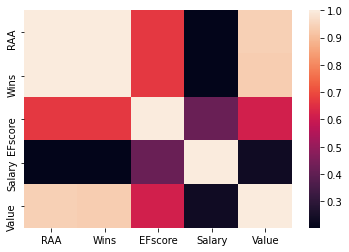

In [21]:
sns.heatmap(df.corr()) #Checking inter-correlations among parameters

In [22]:
#dataframe for numerical cols
num_data = df[['RAA','Wins','EFscore','Salary','Value']]
num_data

,RAA,Wins,EFscore,Salary,Value
0,377,1.355,0.231,NaN,1270355.0
1,347,1.250,0.297,125000.0,1209660.0
2,294,1.059,0.194,NaN,1099252.0
3,216,0.776,0.160,725000.0,935664.0
4,202,0.725,0.139,250000.0,906183.0
...,...,...,...,...,...
2159,-180,-0.607,0.081,714300.0,-297218.0
2160,-191,-0.646,0.061,468750.0,-353939.0
2161,-215,-0.726,0.067,31250.0,-470290.0
2162,-251,-0.848,0.066,1375000.0,-647724.0


In [23]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RAA      2164 non-null   int64  
 1   Wins     2164 non-null   float64
 2   EFscore  2164 non-null   float64
 3   Salary   1526 non-null   float64
 4   Value    2164 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 84.7 KB


In [24]:
num_data.describe()

,RAA,Wins,EFscore,Salary,Value
count,2164.000000,2164.000000,2164.000000,1.526000e+03,2.164000e+03
mean,0.018946,0.000055,0.057640,5.483967e+05,5.545682e+05
std,93.514742,0.334372,0.051832,5.337490e+05,3.740137e+05
min,-339.000000,-1.231000,0.000000,1.500000e+04,-8.798860e+05
25%,-53.000000,-0.189250,0.015000,1.492500e+05,3.696000e+05
50%,-15.000000,-0.052000,0.044000,4.000000e+05,5.086590e+05
75%,37.000000,0.133250,0.089000,7.500000e+05,6.795565e+05
max,615.000000,2.041000,0.365000,3.000000e+06,2.742662e+06


In [25]:
# null counts
num_data.isnull().sum()

RAA          0
Wins         0
EFscore      0
Salary     638
Value        0
dtype: int64

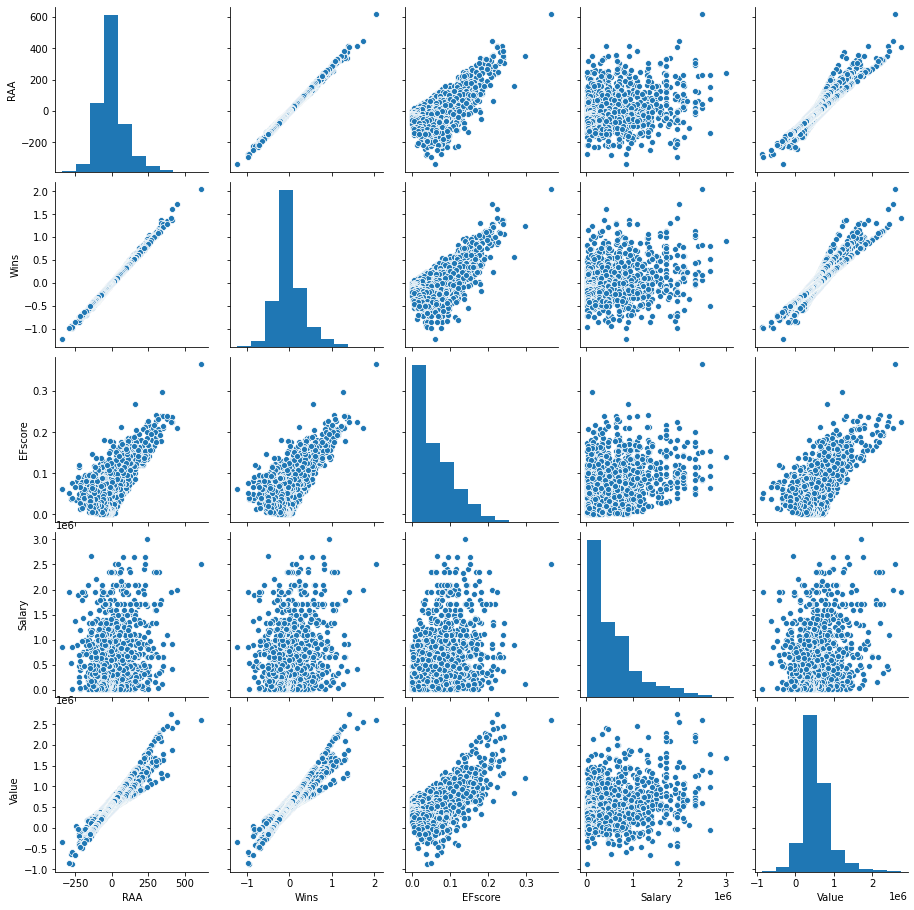

In [26]:
sns.pairplot(num_data)

From looking at the diagrams above, the data looks like it could be fit using algorithms like linear regression, lasso regression, etc. 

Before finalising a regression model for prediction, lets first analyse all the possible regression models that could potentially be used for the data. To do the same, I have used **PyCaret**.

### ML Models Analysis using PyCaret

In [27]:
from pycaret.regression import *

In [28]:
reg = setup(data = df, 
             target = 'Value',
             numeric_imputation = 'mean',
             ignore_features = ['Player','Team'],
             normalize = True,
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2380
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(2164, 7)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [29]:
compare_models()   #compare all models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,91049.854300,15016972183.393600,121978.871000,0.893100,0.529600,0.181000
1,Gradient Boosting Regressor,91451.790000,15416462388.027100,123639.573300,0.890100,0.490800,0.182300
2,CatBoost Regressor,88894.836200,15941488897.519899,125437.967800,0.887800,0.487000,0.148900
3,Light Gradient Boosting Machine,90833.740500,15916626278.064501,125583.122200,0.887400,0.457300,0.145000
4,Bayesian Ridge,99343.530400,16614734876.977400,128547.680700,0.881800,0.513100,0.209400
5,Linear Regression,99343.144500,16614733869.539200,128547.424300,0.881800,0.511800,0.209500
6,Least Angle Regression,99343.144500,16614733869.539200,128547.424300,0.881800,0.511800,0.209500
7,Ridge Regression,99344.019800,16614725929.666100,128548.064900,0.881800,0.515900,0.209200
8,Lasso Least Angle Regression,99346.291600,16614752056.813801,128547.510300,0.881800,0.512500,0.209400
9,Lasso Regression,99343.230000,16614733765.610001,128547.424500,0.881800,0.511800,0.209500


From the above comparison, **Extreme Gradient Boosting** model looks like the most adequate in this case. 

In [47]:
xgb = create_model('xgboost')   #Model creation

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,101382.8594,1.914898e+10,138379.8459,0.8668,0.6113,0.2330
1,89827.8477,1.296889e+10,113881.0190,0.8956,0.4730,-0.0480
2,99037.6589,1.513489e+10,123023.9271,0.8904,0.6341,0.1648
3,91750.8528,1.719314e+10,131122.6234,0.8589,0.4888,0.1080
4,100457.7606,2.069577e+10,143860.2537,0.8816,0.4764,0.0738
5,82885.2924,1.553565e+10,124642.0893,0.9130,0.4048,0.0494
6,86097.9196,1.283922e+10,113310.2773,0.8932,0.5355,0.5919
7,83777.9165,1.224520e+10,110658.0394,0.9036,0.3871,0.1380
8,88312.5725,1.178407e+10,108554.4449,0.9290,0.5261,0.0800
9,86967.8626,1.262391e+10,112356.1900,0.8989,0.7586,0.4195


In [31]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=2380,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [33]:
tuned_xgb = tune_model('xgboost')    #Tuning hyperparameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,101515.4579,2.079541e+10,144206.1471,0.8554,0.4976,0.2921
1,91132.2833,1.473004e+10,121367.3582,0.8814,0.5533,0.1710
2,98244.7063,1.582527e+10,125798.5148,0.8854,0.4038,0.1864
3,99185.0225,2.121667e+10,145659.4402,0.8259,0.4238,0.1327
4,105395.2183,2.345102e+10,153137.2591,0.8659,0.4218,0.0826
5,95468.8771,2.125619e+10,145795.0351,0.8810,0.4875,0.0243
6,91988.5244,1.652919e+10,128565.8867,0.8626,0.5695,0.6925
7,89067.8235,1.536449e+10,123953.5724,0.8790,0.4067,0.1581
8,97091.0368,1.694374e+10,130168.1183,0.8978,0.4394,0.1059
9,92202.0601,1.543537e+10,124239.1774,0.8764,0.5719,0.4087


In [34]:
tuned_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=60, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=2380,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=0)

In [48]:
#evaluate_model(tuned_xgb)

In [90]:
# import pickle
# pickle.dump(tuned_xgb, open('model.pkl','wb'))